In [1]:
import os
import time

from tp1.manejo_archivos_analisis import leer_archivo_analisis
from tp1.tiempo_optimo import tiempo_optimo

directorio = 'data/'  
archivos = os.listdir(directorio)
archivos = sorted(archivos, key=lambda archivo: int(archivo.split(' ')[0]))
resultado = []


for archivo in archivos:
    print("Trabajando con archivo: " + archivo)
    tiempos_analisis = leer_archivo_analisis(directorio + archivo)
    
    tiempo_inicio = time.perf_counter()
    tiempo_optimo(tiempos_analisis)
    tiempo_fin = time.perf_counter()

    
    tiempo_ejecucion = (tiempo_fin - tiempo_inicio) * 1000
    medicion = (len(tiempos_analisis), round(tiempo_ejecucion, 2))
    print(f"N={medicion[0]} T={medicion[1]} ms")
    resultado.append(medicion)
print(resultado)

Trabajando con archivo: 4000 elementos.txt
N=4000 T=0.75 ms
Trabajando con archivo: 8000 elementos.txt
N=8000 T=1.44 ms
Trabajando con archivo: 12000 elementos.txt
N=12000 T=2.92 ms
Trabajando con archivo: 16000 elementos.txt
N=16000 T=3.06 ms
Trabajando con archivo: 20000 elementos.txt
N=20000 T=3.49 ms
Trabajando con archivo: 24000 elementos.txt
N=24000 T=4.21 ms
Trabajando con archivo: 28000 elementos.txt
N=28000 T=4.88 ms
Trabajando con archivo: 32000 elementos.txt
N=32000 T=5.59 ms
Trabajando con archivo: 36000 elementos.txt
N=36000 T=6.34 ms
Trabajando con archivo: 40000 elementos.txt
N=40000 T=7.07 ms
Trabajando con archivo: 44000 elementos.txt
N=44000 T=7.77 ms
Trabajando con archivo: 48000 elementos.txt
N=48000 T=8.57 ms
Trabajando con archivo: 52000 elementos.txt
N=52000 T=11.07 ms
Trabajando con archivo: 56000 elementos.txt
N=56000 T=10.58 ms
Trabajando con archivo: 60000 elementos.txt
N=60000 T=11.36 ms
Trabajando con archivo: 64000 elementos.txt
N=64000 T=12.29 ms
Trabajan

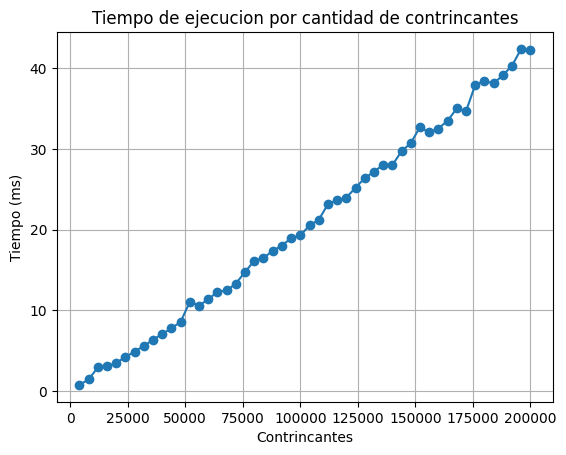

In [2]:
import matplotlib.pyplot as plt

contrincantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contrincantes, tiempos, label= "Tiempo segun cantidad de contrincantes",  marker='o', linestyle='-')
plt.xlabel('Contrincantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contrincantes')
plt.grid(True)

plt.show()

In [3]:
for i in range(1, len(resultado) -1):
    medida_anterior = resultado[i-1][1]
    medida = resultado[i][1]
    medida_siguiente = resultado[i+1][1]

    if medida <= medida_anterior or medida >= medida_siguiente:
        medida_aproximada = (medida_anterior + medida_siguiente)/2
        resultado[i] = (resultado[i][0], round(medida_aproximada, 2))
        print(f"Aproximando resultado {resultado[i][0]}, {medida} a {medida_aproximada} por ser anomalo")
print(resultado)

Aproximando resultado 52000, 11.07 a 9.575 por ser anomalo
Aproximando resultado 136000, 28.03 a 27.56 por ser anomalo
Aproximando resultado 152000, 32.69 a 31.365000000000002 por ser anomalo
Aproximando resultado 168000, 35.0 a 34.05 por ser anomalo
Aproximando resultado 180000, 38.41 a 38.004999999999995 por ser anomalo
Aproximando resultado 196000, 42.38 a 41.26 por ser anomalo
[(4000, 0.75), (8000, 1.44), (12000, 2.92), (16000, 3.06), (20000, 3.49), (24000, 4.21), (28000, 4.88), (32000, 5.59), (36000, 6.34), (40000, 7.07), (44000, 7.77), (48000, 8.57), (52000, 9.57), (56000, 10.58), (60000, 11.36), (64000, 12.29), (68000, 12.45), (72000, 13.31), (76000, 14.75), (80000, 16.14), (84000, 16.48), (88000, 17.36), (92000, 18.01), (96000, 18.94), (100000, 19.27), (104000, 20.51), (108000, 21.2), (112000, 23.14), (116000, 23.66), (120000, 23.97), (124000, 25.17), (128000, 26.39), (132000, 27.15), (136000, 27.56), (140000, 27.97), (144000, 29.71), (148000, 30.7), (152000, 31.37), (156000, 3

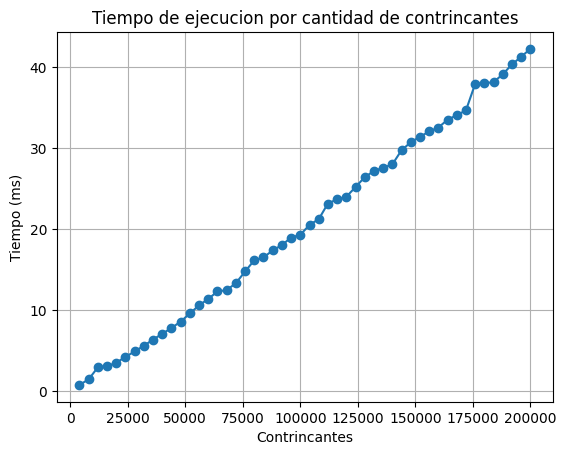

In [4]:
contrincantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contrincantes, tiempos, label= "Tiempo segun cantidad de contrincantes",  marker='o', linestyle='-')
plt.xlabel('Contrincantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contrincantes')
plt.grid(True)

plt.show()

In [5]:
for i in range(1, len(resultado) -1):
    medida_anterior = resultado[i-1][1]
    medida = resultado[i][1]
    medida_siguiente = resultado[i+1][1]

    medida_aproximada = (medida_anterior + medida_siguiente)/2
    resultado[i] = (resultado[i][0], round(medida_aproximada, 2))
    print(f"Suavizando resultado {resultado[i][0]}, {medida} a {medida_aproximada}")
print(resultado)

Suavizando resultado 8000, 1.44 a 1.835
Suavizando resultado 12000, 2.92 a 2.4450000000000003
Suavizando resultado 16000, 3.06 a 2.97
Suavizando resultado 20000, 3.49 a 3.59
Suavizando resultado 24000, 4.21 a 4.234999999999999
Suavizando resultado 28000, 4.88 a 4.91
Suavizando resultado 32000, 5.59 a 5.625
Suavizando resultado 36000, 6.34 a 6.345000000000001
Suavizando resultado 40000, 7.07 a 7.06
Suavizando resultado 44000, 7.77 a 7.8149999999999995
Suavizando resultado 48000, 8.57 a 8.69
Suavizando resultado 52000, 9.57 a 9.635
Suavizando resultado 56000, 10.58 a 10.495000000000001
Suavizando resultado 60000, 11.36 a 11.395
Suavizando resultado 64000, 12.29 a 11.92
Suavizando resultado 68000, 12.45 a 12.615
Suavizando resultado 72000, 13.31 a 13.684999999999999
Suavizando resultado 76000, 14.75 a 14.91
Suavizando resultado 80000, 16.14 a 15.695
Suavizando resultado 84000, 16.48 a 16.53
Suavizando resultado 88000, 17.36 a 17.270000000000003
Suavizando resultado 92000, 18.01 a 18.105
S

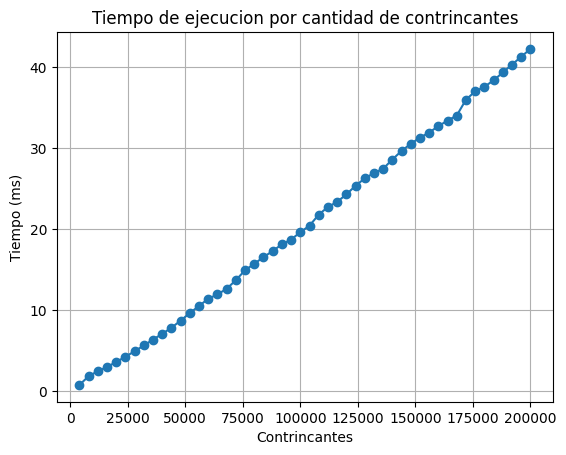

In [6]:
contrincantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

plt.plot(contrincantes, tiempos, label= "Tiempo segun cantidad de contrincantes",  marker='o', linestyle='-')
plt.xlabel('Contrincantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contrincantes')
plt.grid(True)

plt.show()

K estimado en 1.257503204650629e-05


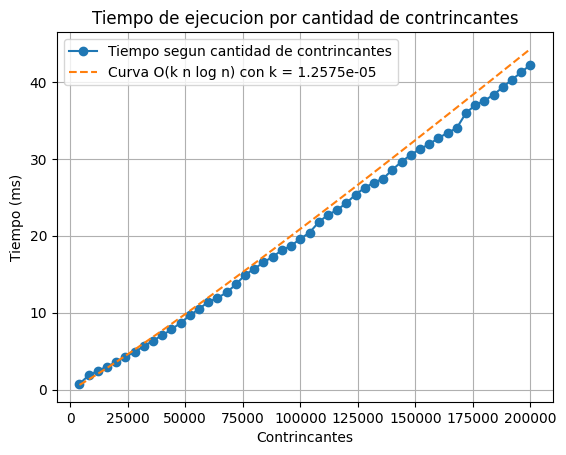

In [17]:
import numpy as np

contrincantes = [analisis[0] for analisis in resultado]
tiempos = [analisis[1] for analisis in resultado]

prom_contrincantes = np.mean(contrincantes)
prom_tiempos = np.mean(tiempos)
k = prom_tiempos / (prom_contrincantes * np.log(prom_contrincantes))
#k = 1.257503204650629e-05
print(f"K estimado en {k}")

tiempos_esperados = [k * n * np.log2(n) for n in contrincantes]

plt.plot(contrincantes, tiempos, label="Tiempo segun cantidad de contrincantes", marker='o', linestyle='-')

plt.plot(contrincantes, tiempos_esperados, label=f'Curva O(k n log n) con k = {k:.4e}', linestyle='--')

plt.xlabel('Contrincantes')
plt.ylabel('Tiempo (ms)')
plt.title('Tiempo de ejecucion por cantidad de contrincantes')
plt.legend()

plt.grid(True)

plt.show()